In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
from tqdm import tqdm
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/')
import psix

In [2]:
psix_object = psix.Psix()
psix_object.process_rnaseq(
        'data/preprocess/tables/SE_counts_filtered.tab.gz',
        'data/preprocess/tables/constitutive_introns_filtered.tab.gz',
        'data/preprocess/tables/rsem_gene_tpm_filtered.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25)

Obtaining psi tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 1067/1067 [00:45<00:00, 23.21it/s]


Successfully processed RNA-seq data


In [3]:
psix_object.compute_psix_scores(latent='data/preprocess/tables/pc3_rd.tab.gz', n_jobs=25, 
                                n_random_exons=2000, n_neighbors=100)#,
#                                turbo='~/psix_project/psix/psix/psix_turbo/')

  0%|          | 0/1067 [00:00<?, ?it/s]

cell-cell metric not found. Computing metric...


100%|██████████| 1067/1067 [00:00<00:00, 1768.80it/s]

Successfully computed cell-cell metric
Computing Psix score in 2087 exons



100%|██████████| 2087/2087 [00:19<00:00, 109.73it/s]


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 25/25 [08:37<00:00, 20.71s/it]  


Successfully estimated p-values


In [4]:
psix_results = psix_object.psix_results
psix_results.head()

,psix_score,pvals,qvals
Mapt_1,2.709381,0.0005,0.001879
Ndrg4_1,2.359093,0.0005,0.001879
Dbn1_1,2.302729,0.0005,0.001879
Mapt_3,1.964202,0.0005,0.001879
Gabrg2_1,1.896363,0.0005,0.001879


In [4]:
psix_results = psix_object.psix_results
psix_results.head()

,psix_score,pvals,qvals
Mapt_1,2.709381,0.0005,0.001879
Ndrg4_1,2.359093,0.0005,0.001879
Dbn1_1,2.302729,0.0005,0.001879
Mapt_3,1.964202,0.0005,0.001879
Gabrg2_1,1.896363,0.0005,0.001879


100%|██████████| 2087/2087 [00:11<00:00, 175.99it/s]


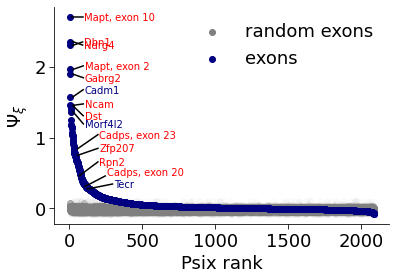

In [5]:
psix_results = psix_object.psix_results.copy()
psix_results['bins'] = ['']*len(psix_results.index)

for mean in psix_object.bins.keys():
    for var in psix_object.bins[mean].keys():
        for exon in psix_object.bins[mean][var]:
            psix_results.loc[exon, 'bins'] = mean +'_' + var
            
fig = plt.figure()
ax  = plt.subplot(1,1,1)
i = 1

ax.scatter([100], [-0.05], c='gray', label='random exons')

for mean_var in tqdm(psix_results.sort_values('psix_score')[::-1].bins):
    mean = mean_var[:6]
    var = mean_var[7:]
    subset = np.random.choice(psix_object.random_scores[mean][var], 50, replace=False)
    ax.scatter([i]*50, subset, c='gray', alpha=0.02)
    i += 1


plt.text(100, psix_results.loc['Mapt_1'].psix_score-0.05, 'Mapt, exon 10', c='red')   
plt.plot([20, 90], [psix_results.loc['Mapt_1'].psix_score, psix_results.loc['Mapt_1'].psix_score],c='black')

plt.text(100, psix_results.loc['Ndrg4_1'].psix_score-0.1, 'Ndrg4', c='red')   
plt.plot([20, 90], [psix_results.loc['Ndrg4_1'].psix_score, psix_results.loc['Ndrg4_1'].psix_score-0.05],c='black')

plt.text(100, psix_results.loc['Dbn1_1'].psix_score, 'Dbn1', c='red')   
plt.plot([20, 90], [psix_results.loc['Dbn1_1'].psix_score, psix_results.loc['Dbn1_1'].psix_score+0.05],c='black')

plt.text(104, psix_results.loc['Mapt_3'].psix_score, 'Mapt, exon 2', c='red')    
plt.plot([24, 94], [psix_results.loc['Mapt_3'].psix_score, psix_results.loc['Mapt_3'].psix_score+0.05],c='black')

plt.text(105, psix_results.loc['Gabrg2_1'].psix_score-0.1, 'Gabrg2', c='red')   
plt.plot([25, 95], [psix_results.loc['Gabrg2_1'].psix_score, psix_results.loc['Gabrg2_1'].psix_score-0.05],c='black')

plt.text(104, psix_results.loc['Cadm1_10'].psix_score+0.05, 'Cadm1', c='navy')    
plt.plot([24, 94], [psix_results.loc['Cadm1_10'].psix_score, psix_results.loc['Cadm1_10'].psix_score+0.1],c='black')

plt.text(105, psix_results.loc['Ncam1_6'].psix_score-0.03, 'Ncam', c='red')   
plt.plot([25, 95], [psix_results.loc['Ncam1_6'].psix_score, psix_results.loc['Ncam1_6'].psix_score+0.02],c='black')

plt.text(104, psix_results.loc['Dst_5'].psix_score-0.19, 'Dst', c='red')    
plt.plot([24, 94], [psix_results.loc['Dst_5'].psix_score, psix_results.loc['Dst_5'].psix_score-0.14],c='black')

plt.text(105, psix_results.loc['Morf4l2_7'].psix_score-0.22, 'Morf4l2', c='navy')   
plt.plot([25, 95], [psix_results.loc['Morf4l2_7'].psix_score, psix_results.loc['Morf4l2_7'].psix_score-0.17],c='black')

plt.text(305, psix_results.loc['Tecr_6'].psix_score+0.02, 'Tecr', c='navy')   
plt.plot([125, 295], [psix_results.loc['Tecr_6'].psix_score, psix_results.loc['Tecr_6'].psix_score+0.07],c='black')

plt.text(205, psix_results.loc['Rpn2_3'].psix_score+0.15, 'Rpn2', c='red')   
plt.plot([65, 195], [psix_results.loc['Rpn2_3'].psix_score, psix_results.loc['Rpn2_3'].psix_score+0.2],c='black')

plt.text(255, psix_results.loc['Cadps_2'].psix_score+0.15, 'Cadps, exon 20', c='red')   
plt.plot([105, 245], [psix_results.loc['Cadps_2'].psix_score, psix_results.loc['Cadps_2'].psix_score+0.15],c='black')

plt.text(205, psix_results.loc['Cadps_7'].psix_score+0.15, 'Cadps, exon 23', c='red')   
plt.plot([55, 195], [psix_results.loc['Cadps_7'].psix_score, psix_results.loc['Cadps_7'].psix_score+0.2],c='black')

plt.text(205, psix_results.loc['Zfp207_1'].psix_score+0.05, 'Zfp207', c='red')   
plt.plot([55, 195], [psix_results.loc['Zfp207_1'].psix_score, psix_results.loc['Zfp207_1'].psix_score+0.1],c='black')

ax.scatter(np.arange(1, len(psix_results.index)+1), psix_results.sort_values('psix_score')[::-1].psix_score, c = 'navy',
          label='exons')
    
plt.xlabel('Psix rank', fontsize=18)
plt.ylabel(r'$\Psi_{\xi}$', fontsize=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(labelsize=18, length=5)
plt.legend(frameon=False, fontsize=18)

# plt.savefig('plots/psix_scores.png', bbox_inches='tight', res=100)
# plt.savefig('plots/psix_scores.svg', bbox_inches='tight')
# plt.savefig('plots/psix_scores.pdf', bbox_inches='tight')

In [5]:
psix_object.compute_neighbors_psi(latent='data/preprocess/tables/pc3_rd.tab.gz', n_neighbors=100)

Successfully computed neighbors


In [6]:
np.sum((psix_results.psix_score > 0) & (psix_results.qvals <= 0.05))

798

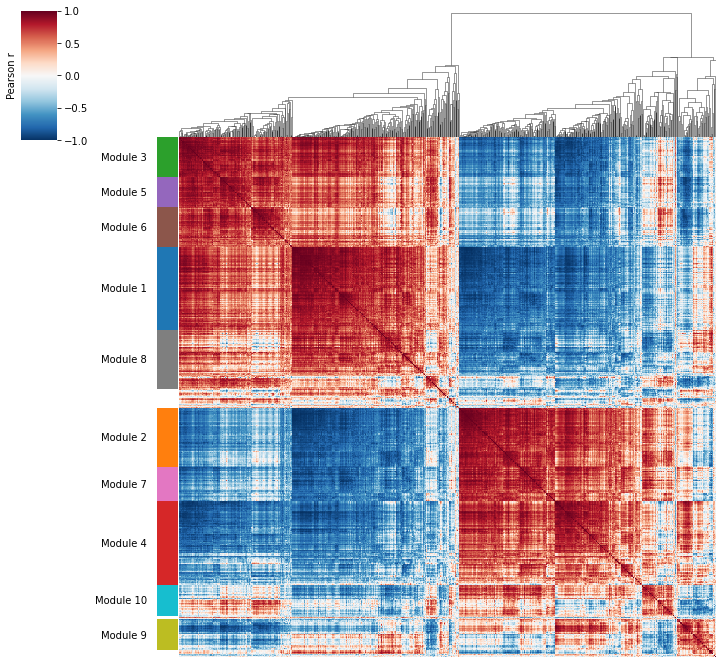

In [7]:
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/analysis_psix/utils/')
from misc_utils import *

background_psi = psix_object.adata.uns['neighbors_psi'].mask(psix_object.adata.uns['psi'].isna()).T
exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index

bwow = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=30, fdr_threshold=None, z_threshold=0.3, core_only=False)

aver = local_correlation_plot(
            background_psi.loc[exon_list].T.corr().fillna(0), bwow[0], bwow[1],
            mod_cmap='tab10', vmin=-1, vmax=1,
            z_cmap='RdBu_r', yticklabels=False
)

In [8]:
modules_neuron_diversity = bwow[0]
modules_exons = pd.read_csv('psix_object/modules.tab.gz', sep='\t', index_col=0).Module

In [9]:
modules_neuron_diversity.loc[[x for x in modules_neuron_diversity.index if 'Srsf' in x]]

Srsf9_nmdSE_1     1
Srsf9_nmdSE_2     1
Srsf9_2           1
Srsf6_nmdSE_1     6
Srsf6_1           6
Srsf7_nmdSE_1     6
Srsf10_nmdSE_1    6
Srsf11_nmdSE_2    8
Srsf2_1           8
Name: Module, dtype: int64

Index(['Lrrcc1_2', 'Mpv17_4', 'Mpv17_2', 'Neo1_5', 'Dusp12_6', 'Dusp12_1',
       'Zfp207_5', 'Dnal4_1', 'Gria2_nmdSE_1', 'Eif5a_9', 'Eif5a_4', 'Shmt2_1',
       'Evl_3', 'Epb41l1_3', 'Prkab1_2', 'Adgrb3_4', 'Exoc1_3',
       'Gria3_nmdSE_2', 'Rusc2_4', 'Tpp2_2', 'Stx3_5'],
      dtype='object')

####################
Lrrcc1_2


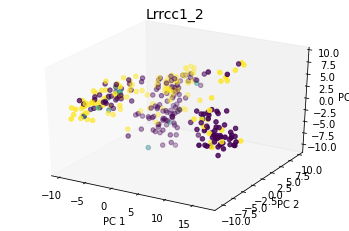

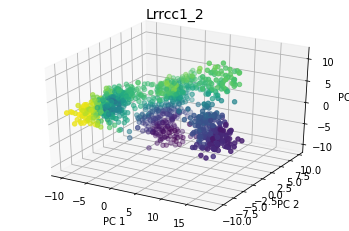

####################
Mpv17_4


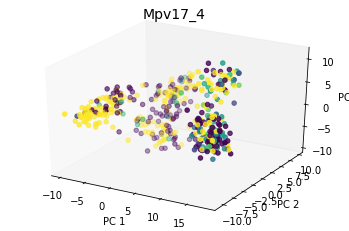

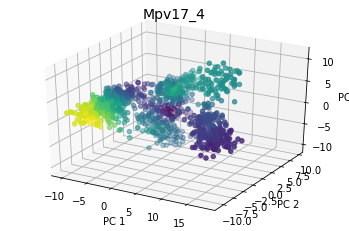

####################
Mpv17_2


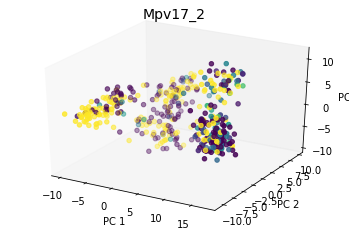

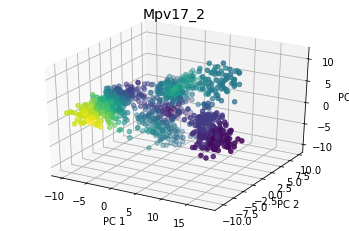

####################
Neo1_5


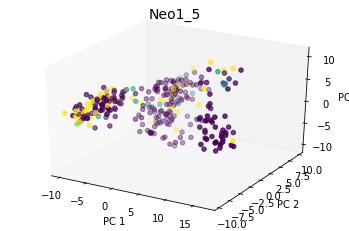

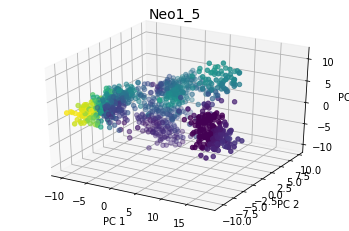

####################
Dusp12_6


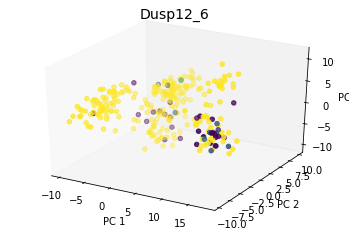

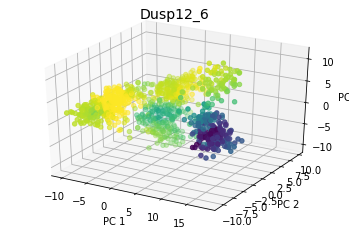

####################
Dusp12_1


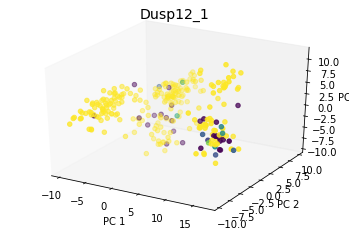

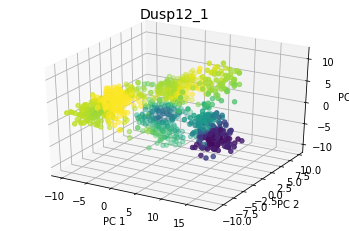

####################
Zfp207_5


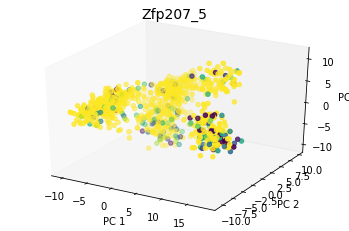

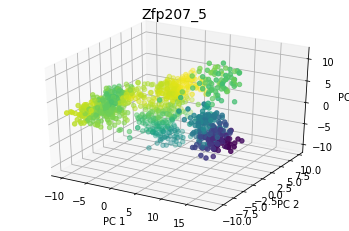

####################
Dnal4_1


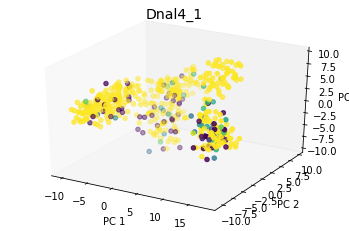

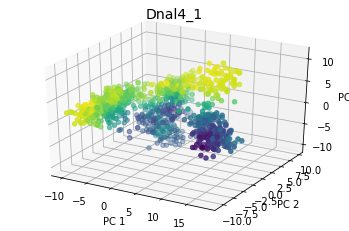

####################
Gria2_nmdSE_1


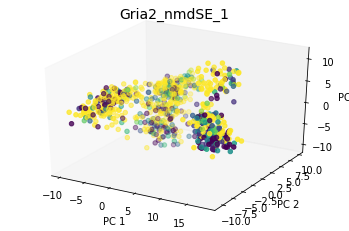

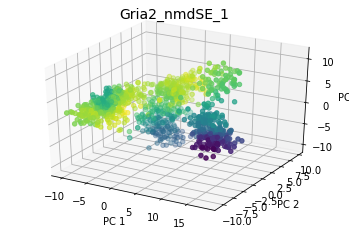

####################
Eif5a_9


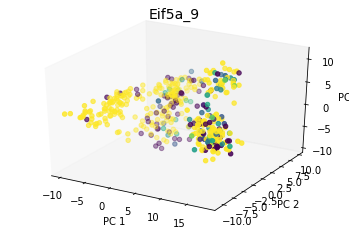

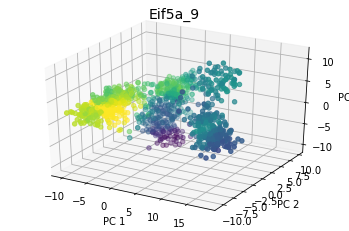

####################
Eif5a_4


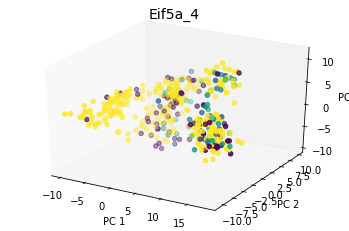

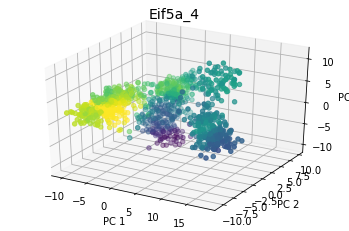

####################
Shmt2_1


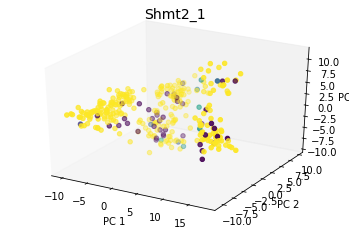

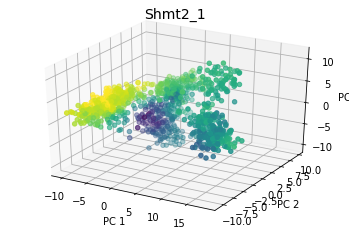

####################
Evl_3


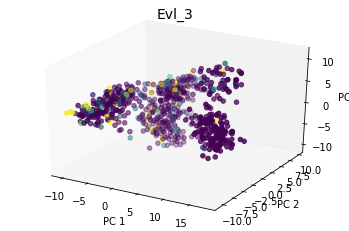

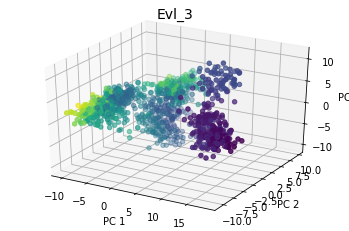

####################
Epb41l1_3


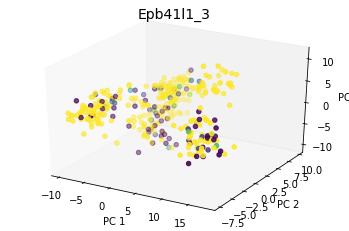

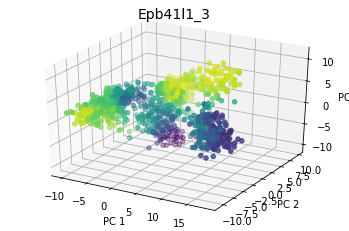

####################
Prkab1_2


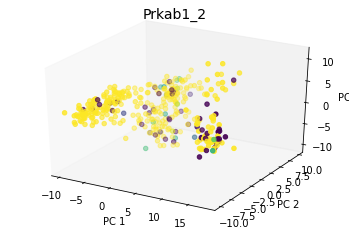

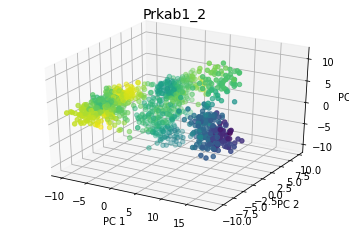

####################
Adgrb3_4


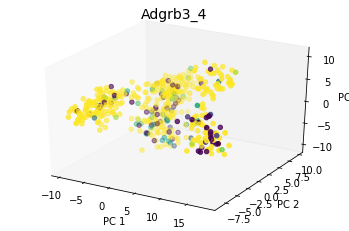

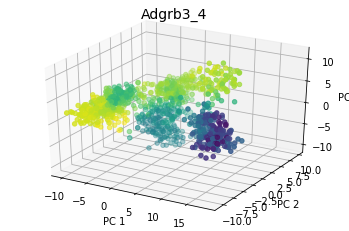

####################
Exoc1_3


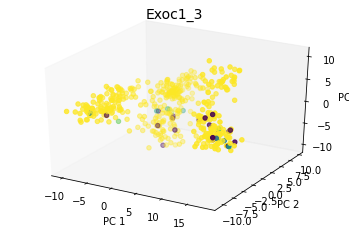

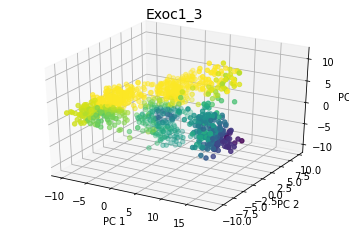

####################
Gria3_nmdSE_2


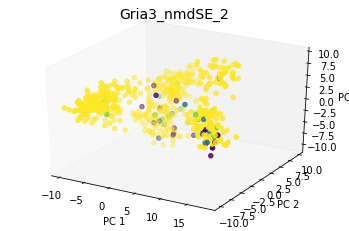

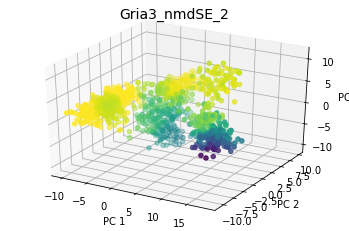

####################
Rusc2_4


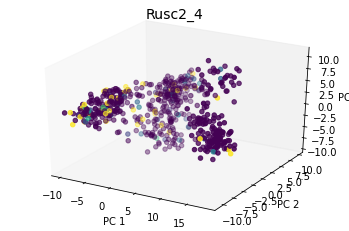

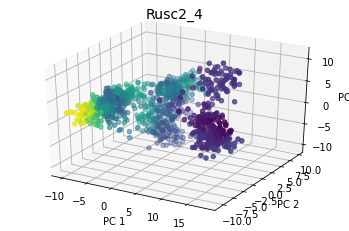

####################
Tpp2_2


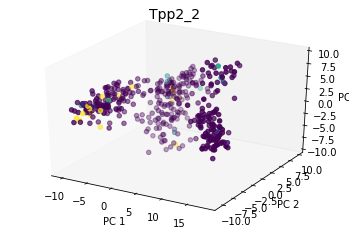

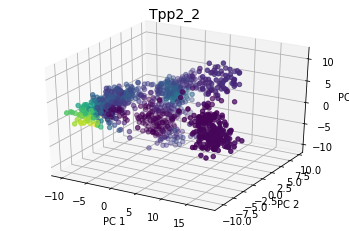

####################
Stx3_5


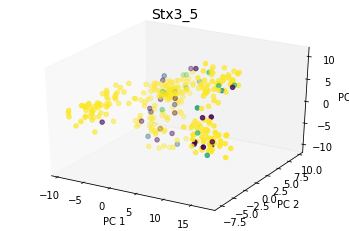

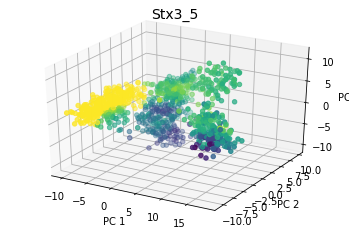

In [65]:
for exon in modules_neuron_diversity.index[modules_neuron_diversity == 10]:

    print('####################')
    print(exon)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(psix_object.latent.PC_1, psix_object.latent.PC_2, psix_object.latent.PC_3, 
               c=psix_object.adata.uns['psi'][exon])
    
    ax.grid(False)

    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')
    ax.set_title(exon, fontsize=14)

    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(psix_object.latent.PC_1, psix_object.latent.PC_2, psix_object.latent.PC_3, 
               c=psix_object.adata.uns['neighbors_psi'][exon])

    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')
    ax.set_title(exon, fontsize=14)

    plt.show()

In [50]:
psix_object.psix_results.loc['Stx3_5']

psix_score    0.017425
pvals         0.010995
qvals         0.030594
Name: Stx3_5, dtype: float64

In [17]:
modules_exons.loc[[x for x in modules_exons.index if 'Srsf' in x]]

Srsf9_nmdSE_1     1
Srsf9_nmdSE_2     1
Srsf9_2           1
Srsf6_nmdSE_1     6
Srsf6_1           6
Srsf7_nmdSE_1     6
Srsf2_1           6
Srsf11_nmdSE_2    1
Srsf10_nmdSE_1    6
Name: Module, dtype: int64

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
shared = modules_neuron_diversity.index & modules_exons.index

Text(0.5, 1.0, 'Module confusion matrix')

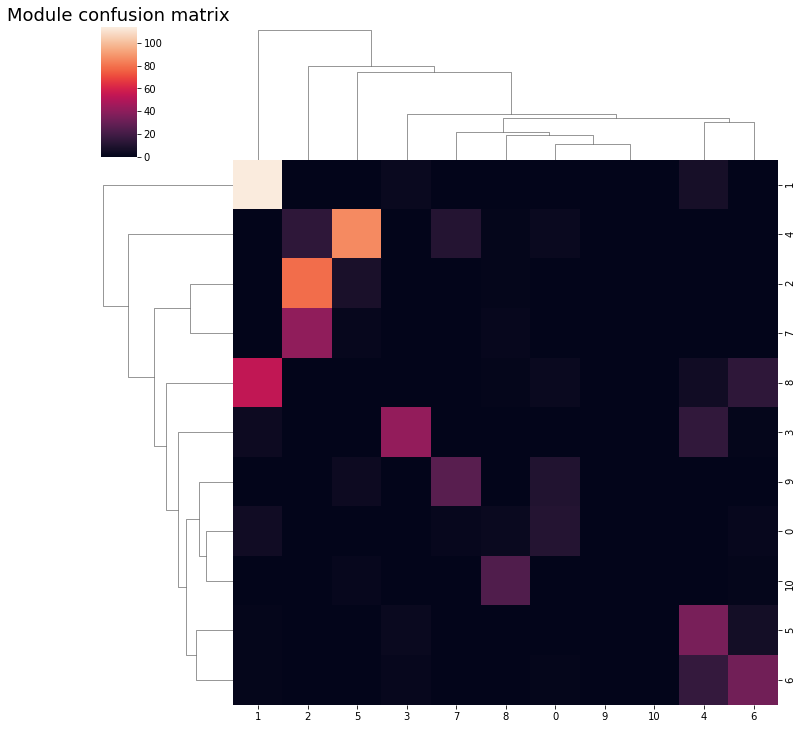

In [12]:
sns.clustermap(confusion_matrix(np.array(modules_neuron_diversity.loc[shared]),
                 np.array(modules_exons.loc[shared])))
plt.title('Module confusion matrix', fontsize=18)

(2.0, 4.0)

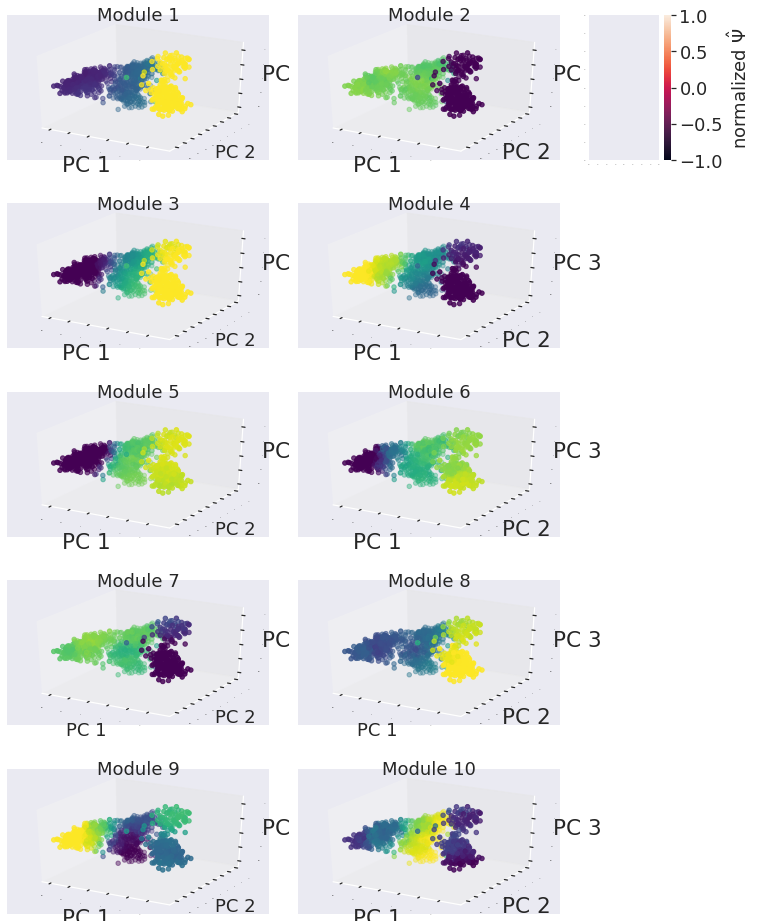

In [18]:
from scipy.stats import zscore
from itertools import product
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 20))
gs = GridSpec(6,12)
gs.update(wspace=1, hspace=0.3)

ax_positions = list(product(range(5), range(2)))

background_psi = psix_object.adata.uns['neighbors_psi'].T

for mod in range(1, 11):
    
    mad_df = pd.DataFrame()
    for exon in bwow[0].index[bwow[0]==mod]:
        mad_df[exon] = zscore(background_psi.loc[exon])
    mad_df.index= psix_object.adata.uns['psi'].index
    
    x, y = ax_positions[mod-1]
    
    ax = fig.add_subplot(gs[x,(5*y):(5*y)+5], projection='3d')
 



    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')


    sc = ax.scatter(psix_object.latent.PC_1, 
                    psix_object.latent.PC_2,
                    psix_object.latent.PC_3,
                    c=mad_df.mean(axis=1), vmin=-1, vmax=1, cmap='viridis')
    
    
    plt.title('Module '+str(mod), fontsize=18)
    if x == 3:
        plt.xlabel('PC 1', fontsize=18)
    if y == 0:
        plt.ylabel('PC 2', fontsize=18)

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(labelsize=0, length=0)
    ax.grid(False)
#     plt.show()
ax = fig.add_subplot(gs[0,10:12])
ax.grid(False)
sc = ax.scatter([0, 0], [0, 0], c=[-1, 1])
cb = plt.colorbar(sc, shrink = 1, aspect=20)
cb.set_label(label='normalized $\hat{\Psi}$',size=18)
cb.ax.tick_params(labelsize=18, length=5)
cb.outline.set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.tick_params(labelsize=0, length=0)
ax.set_xlim((2, 4))
ax.set_ylim((2, 4))

In [13]:
motif_dir = '~/Network/Mouse/SplicingNetwork/L_score_events/meme_motifs/'
mouse_motifs_exons = pd.read_csv(motif_dir + 'mouse_rbp.exons.tab', sep='\t', index_col=0)
mouse_motifs_ase = pd.read_csv(motif_dir + 'mouse_rbp.ase.tab', sep='\t', index_col=0)

human_motifs_exons = pd.read_csv(motif_dir + 'human_rbp.exons.tab', sep='\t', index_col=0)
human_motifs_ase = pd.read_csv(motif_dir + 'human_rbp.ase.tab', sep='\t', index_col=0)

clip_dir = '~/Network/Mouse/SplicingNetwork/L_score_events/tiklova/'
mouse_clip_predicted = pd.read_csv(clip_dir + 'peaks_predicted_mRBP.tab', sep='\t', index_col=0)
mouse_clip_peaks = pd.read_csv(clip_dir + 'peaks_clip_tags.tab', sep='\t', index_col=0)

mouse_clip_predicted = (mouse_clip_predicted.loc[[x for x in mouse_clip_predicted.index if x[-3:]=='_se']] > 0).astype(int)
mouse_clip_peaks = (mouse_clip_peaks.loc[[x for x in mouse_clip_peaks.index if x[-3:]=='_se']] > 0).astype(int)

mouse_clip_predicted.index= [x[:-3] for x in mouse_clip_predicted.index if x[-3:]=='_se']
mouse_clip_peaks.index= [x[:-3] for x in mouse_clip_peaks.index if x[-3:]=='_se']

clip_dir = '~/Network/Mouse/SplicingNetwork/L_score_events/tiklova_hRBP/'
human_clip_predicted = pd.read_csv(clip_dir + 'peaks_predicted_hRBP.tab', sep='\t', index_col=0)

human_clip_predicted = (human_clip_predicted.loc[[x for x in human_clip_predicted.index if x[-3:]=='_se']] > 0).astype(int)
human_clip_predicted.index= [x[:-3] for x in human_clip_predicted.index if x[-3:]=='_se']

clip_dir = '~/Network/Mouse/SplicingNetwork/L_score_events/tiklova/'

mouse_clip_peaks = pd.read_csv(clip_dir + 'peaks_clip_tags_overlap_len.tab', sep='\t', index_col=0)

mouse_clip_predicted = (mouse_clip_predicted.loc[[x for x in mouse_clip_predicted.index if x[-3:]=='_se']] > 0).astype(int)
mouse_clip_peaks = (mouse_clip_peaks.loc[[x for x in mouse_clip_peaks.index if x[-3:]=='_se']] > 0).astype(int)

mouse_clip_predicted.index= [x[:-3] for x in mouse_clip_predicted.index if x[-3:]=='_se']
mouse_clip_peaks.index= [x[:-3] for x in mouse_clip_peaks.index if x[-3:]=='_se']


mouse_clip_peaks = pd.read_csv(clip_dir + 'peaks_clip_tags_overlap_len.tab', sep='\t', index_col=0)
exon_lengths = pd.read_csv('~/Network/Mouse/SplicingNetwork/L_score_events/tiklova/exon_lengths.tab', sep='\t',
                           index_col=0, names=['exon', 'ase', 'length']).loc[mouse_clip_peaks.index]
exon_lengths.index == mouse_clip_peaks.index

mouse_clip_overlap = mouse_clip_peaks.divide(exon_lengths.length, axis=0)


mouse_clip_overlap = mouse_clip_overlap.loc[[x for x in mouse_clip_overlap.index if x[-3:]=='_se']]
mouse_clip_peaks = (mouse_clip_peaks.loc[[x for x in mouse_clip_peaks.index if x[-3:]=='_se']] > 0).astype(int)

mouse_clip_overlap.index= [x[:-3] for x in mouse_clip_overlap.index if x[-3:]=='_se']
mouse_clip_peaks.index= [x[:-3] for x in mouse_clip_peaks.index if x[-3:]=='_se']

exons_sorted = psix_results.loc[mouse_clip_overlap.index & psix_results.index].sort_values('psix_score').index[::-1]

list_modules = []

colores = ['forestgreen', 'indigo', 'brown', 'navy']

def enrichment_score(signal, exon_score=1):
    Nr = np.sum(signal)
    #exon_score = [1]*len(signal)
    denominator = len(signal) - np.sum(np.array(signal)>0)
    
    p_hit = []
    p_miss = []
    current_p_hit = 0
    current_p_miss = 0
    for i in range(len(signal)):
        if signal[i] > 0:
            current_p_hit += signal[i]/Nr
        else:
            current_p_miss += 1/denominator
        
        p_hit.append(current_p_hit)
        p_miss.append(current_p_miss)
        
    p_hit = np.array(p_hit)
    p_miss = np.array(p_miss)
    return p_hit-p_miss
    
def gsea(signal, permutations=2000):
    ES = np.max(enrichment_score(signal))
    ES_random = []
    for i in tqdm(range(permutations)):
        random_signal = np.random.choice(signal, len(signal), replace=False)
        ES_random.append(np.max(enrichment_score(random_signal)))
        
    ES_random = np.array(ES_random)
    p_val = (np.sum(ES_random >= ES)+1)/(permutations+1)
    return ES, p_val

# plt.plot(range(len(exons_sorted)),
#          enrichment_score(list(mouse_clip_overlap.loc[exons_sorted]['NOVA1'])))

In [14]:
import scipy.stats as ss
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests

def hyper_test(M, n, N, k):
    '''
    Calculates the hypergeometric test.
    
    Input:
      M: Population size (total exons tested)
      n: Successess in population (exons with p-value <= x)
      N: Sample size (exons selected)
      k: Successes in sample (selected exons with p-value <= x)
    Output:
      p_depleted: p-value of depletion from the hypergeometric test
      p_enriched: p-value of enrichment from the hypergeometric test
    '''
    hpd = hypergeom(M, n, N) # Hypergeometric distribution
    p_depleted = hpd.cdf(k)  # Get cummulative distribution up to k
    p_enriched = hpd.sf(k-1) # Survival function up to k-1 (1 - cdf(k-1))
    return p_depleted, p_enriched


def test_enrichment(binding, exon_cluster):
    M = len(binding)
    n = binding.sum()
    N = len(exon_cluster)
    k = binding.loc[exon_cluster].sum()
    p_depleted, p_enriched = hyper_test(M, n, N, k)
    
    enrichment = (k/N)/(n/M)
    
    if enrichment == 0:
        log_enrich = -3
    else:
        log_enrich = np.log2(enrichment)
        
    
    return p_enriched, p_depleted, log_enrich

In [19]:
clip_dir = '~/Network/Mouse/SplicingNetwork/psix_events/clip_seq/'

mouse_clip_peaks = (pd.read_csv(clip_dir + 'peaks_clip_tags_overlap_len.tab', sep='\t', index_col=0) > 0).astype(int)
s1_exons = [x for x in mouse_clip_peaks.index if x[-3:]=='_s1']
s2_exons = [x for x in mouse_clip_peaks.index if x[-3:]=='_s2']
e1_exons = [x for x in mouse_clip_peaks.index if x[-3:]=='_e1']
e2_exons = [x for x in mouse_clip_peaks.index if x[-3:]=='_e2']




mouse_clip_families = pd.DataFrame()
mouse_clip_families['NOVA_e1'] = np.array(mouse_clip_peaks.loc[e1_exons, ['NOVA1', 'NOVA2']].max(axis=1))
mouse_clip_families['NOVA_s1'] = np.array(mouse_clip_peaks.loc[s1_exons, ['NOVA1', 'NOVA2']].max(axis=1))
mouse_clip_families['NOVA_s2'] = np.array(mouse_clip_peaks.loc[s2_exons, ['NOVA1', 'NOVA2']].max(axis=1))
mouse_clip_families['NOVA_e2'] = np.array(mouse_clip_peaks.loc[e2_exons, ['NOVA1', 'NOVA2']].max(axis=1))

mouse_clip_families['RBFOX_e1'] = np.array(mouse_clip_peaks.loc[e1_exons, ['RBFOX1', 'RBFOX2', 'RBFOX3']].max(axis=1))
mouse_clip_families['RBFOX_s1'] = np.array(mouse_clip_peaks.loc[s1_exons, ['RBFOX1', 'RBFOX2', 'RBFOX3']].max(axis=1))
mouse_clip_families['RBFOX_s2'] = np.array(mouse_clip_peaks.loc[s2_exons, ['RBFOX1', 'RBFOX2', 'RBFOX3']].max(axis=1))
mouse_clip_families['RBFOX_e2'] = np.array(mouse_clip_peaks.loc[e2_exons, ['RBFOX1', 'RBFOX2', 'RBFOX3']].max(axis=1))

# mouse_clip_families['MBNL_e1'] = np.array(mouse_clip_peaks.loc[e1_exons, ['MBNL1', 'MBNL2', 'MBNL1MBNL2']].max(axis=1))
# mouse_clip_families['MBNL_se'] = np.array(mouse_clip_peaks.loc[se_exons, ['MBNL1', 'MBNL2', 'MBNL1MBNL2']].max(axis=1))
# mouse_clip_families['MBNL_e2'] = np.array(mouse_clip_peaks.loc[e2_exons, ['MBNL1', 'MBNL2', 'MBNL1MBNL2']].max(axis=1))

mouse_clip_families['SRSF_e1'] = np.array(mouse_clip_peaks.loc[e1_exons, 
                                                               ['SRSF3', 'SRSF4', 'SRSF5', 'SRSF6', 'SRSF7']].max(axis=1))
mouse_clip_families['SRSF_s1'] = np.array(mouse_clip_peaks.loc[s1_exons, 
                                                               ['SRSF3', 'SRSF4', 'SRSF5', 'SRSF6', 'SRSF7']].max(axis=1))
mouse_clip_families['SRSF_s2'] = np.array(mouse_clip_peaks.loc[s2_exons, 
                                                               ['SRSF3', 'SRSF4', 'SRSF5', 'SRSF6', 'SRSF7']].max(axis=1))
mouse_clip_families['SRSF_e2'] = np.array(mouse_clip_peaks.loc[e2_exons, 
                                                               ['SRSF3', 'SRSF4', 'SRSF5', 'SRSF6', 'SRSF7']].max(axis=1))
# mouse_clip_families['CELF'] = mouse_clip_peaks['CELF4']#.max(axis=1)
# mouse_clip_families['TARDBP'] = mouse_clip_peaks['TARDBP']#.max(axis=1)
# mouse_clip_families['LIN28A'] = mouse_clip_peaks['LIN28A']#.max(axis=1)
mouse_clip_families.index = [x[:-3] for x in mouse_clip_peaks.index if (x[-3:]=='_s1')]

modules = bwow[0]
modules = modules.loc[modules.index & mouse_clip_families.index]
mouse_clip_families = mouse_clip_families.loc[psix_results.index & mouse_clip_families.index]

print(mouse_clip_families.shape)

# mouse_clip_predicted = (mouse_clip_predicted.loc[[x for x in mouse_clip_predicted.index if x[-3:]=='_se']] > 0).astype(int)
# mouse_clip_peaks = (mouse_clip_peaks.loc[[x for x in mouse_clip_peaks.index if x[-3:]=='_se']] > 0).astype(int)

# mouse_clip_predicted.index= [x[:-3] for x in mouse_clip_predicted.index if x[-3:]=='_se']
# mouse_clip_peaks.index= [x[:-3] for x in mouse_clip_peaks.index if x[-3:]=='_se']

hyper_enrichment = pd.DataFrame()
hyper_pval_enrich = pd.DataFrame()
hyper_pval_deplete = pd.DataFrame()
for rbp in mouse_clip_families.columns:
    p_enrich = []
    p_deplete = []
    log_enrich = []
    for module in range(1, 11):
        enrichment = test_enrichment(mouse_clip_families[rbp], modules.index[(modules==module)])
        p_enrich.append(enrichment[0])
        p_deplete.append(enrichment[1])
        log_enrich.append(enrichment[2])
        
    hyper_enrichment[rbp] = log_enrich
    hyper_pval_enrich[rbp] = p_enrich
    hyper_pval_deplete[rbp] = p_deplete
    
hyper_enrichment.index = ['M'+ str(x) for x in range(1, 11)]
hyper_pval_enrich.index = ['M'+ str(x) for x in range(1, 11)]
hyper_pval_deplete.index = ['M'+ str(x) for x in range(1, 11)]
    
        
hyper_enrich_significance = pd.DataFrame(multipletests(np.array(hyper_pval_enrich).reshape(1,-1)[0], 
                                                       method='fdr_bh')[1].reshape(10,-10)<=0.05)
hyper_enrich_significance.index = hyper_pval_enrich.index
hyper_enrich_significance.columns = hyper_pval_enrich.columns

labels = hyper_enrich_significance.copy()
for exon in hyper_enrich_significance.index:
    for rbp in hyper_enrich_significance.columns:
        if labels.loc[exon, rbp]:
            labels.loc[exon, rbp] = '*'
        else:
            labels.loc[exon, rbp] = ''
# from statsmodels.stats.multitest import multipletests

(2087, 12)


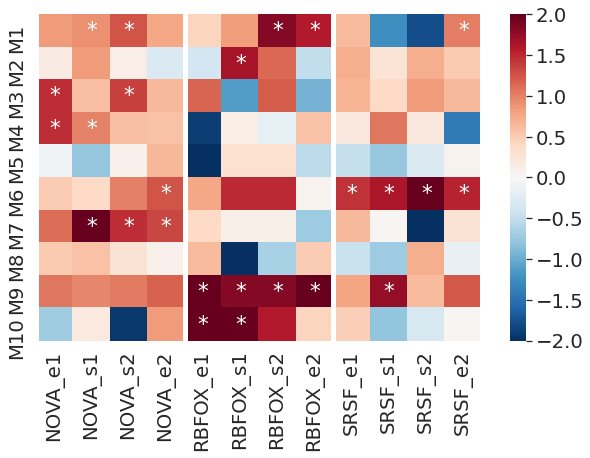

In [20]:
sns.set(font_scale=1.8)

fig = plt.figure(figsize=(10, 6))
ax = sns.heatmap(hyper_enrichment, cmap='RdBu_r', vmin=-2, vmax=2, annot=labels, fmt='')
for i in range(0, hyper_enrichment.shape[1] + 1, 4):
    ax.axvline(i, color='white', lw=5)
# for i in range(data.shape[1] + 1):
#     ax.axvline(i, color='white', lw=60)
plt.show()

(2.0, 4.0)

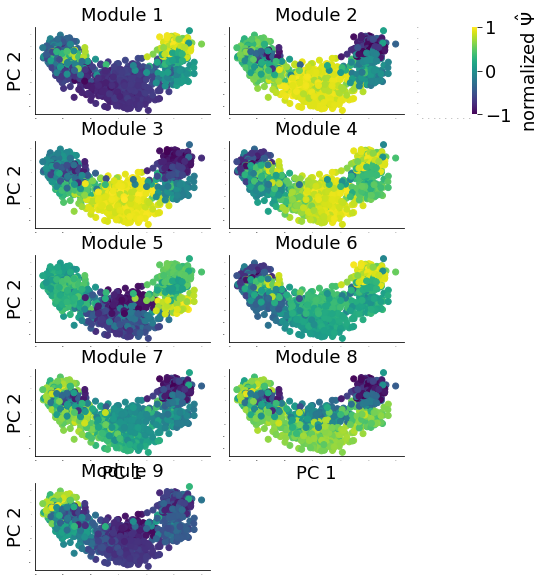

In [108]:
from scipy.stats import zscore
from itertools import product
from matplotlib.gridspec import GridSpec

latent2 = pd.read_csv('data/preprocess/tables/pc2_rd.tab.gz', sep='\t', index_col=0)

fig = plt.figure(figsize=(8, 10))
gs = GridSpec(5,12)
gs.update(wspace=1, hspace=0.3)

ax_positions = list(product(range(5), range(2)))

background_psi = psix_object.adata.uns['neighbors_psi'].T

for mod in range(1,10):
    
    mad_df = pd.DataFrame()
    for exon in bwow[0].index[bwow[0]==mod]:
        mad_df[exon] = zscore(background_psi.loc[exon])
    mad_df.index= psix_object.adata.uns['psi'].index
    
    x, y = ax_positions[mod-1]
    
    ax = fig.add_subplot(gs[x,(5*y):(5*y)+5])

    sc = ax.scatter(latent2.PC_1, 
                    latent2.PC_2, 
                    c=mad_df.mean(axis=1), cmap='viridis')
    
    
    plt.title('Module '+str(mod), fontsize=18)
    if x == 3:
        plt.xlabel('PC 1', fontsize=18)
    if y == 0:
        plt.ylabel('PC 2', fontsize=18)

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(labelsize=0, length=0)
    ax.grid(False)
#     plt.show()
ax = fig.add_subplot(gs[0,10:12])
ax.grid(False)
sc = ax.scatter([0, 0], [0, 0], c=[-1, 1])
cb = plt.colorbar(sc, shrink = 1, aspect=20)
cb.set_label(label='normalized $\hat{\Psi}$',size=18)
cb.ax.tick_params(labelsize=18, length=5)
cb.outline.set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.tick_params(labelsize=0, length=0)
ax.set_xlim((2, 4))
ax.set_ylim((2, 4))

In [98]:
pd.DataFrame(bwow[0]).to_csv('psix_object/modules_pc5.tab.gz', sep='\t', index=True, header=True)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
psix_results = pd.read_csv('psix_object/psix_results.tab.gz', sep='\t', index_col=0)
psi = psix_object.adata.uns['psi']

pc = PCA(5)
pca = pc.fit_transform(KNNImputer().fit_transform(psi[psix_results.loc[psix_results.qvals <= 0.05].index].T).T)
plt.scatter(pca.T[0], pca.T[1], c=psi['Mapt_1'])




In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8, 4))
gs = GridSpec(1,5)
gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(gs[0,0:4])
ax_2 = fig.add_subplot(gs[0,4])
ax.scatter(pca.T[0], pca.T[1], c=colores)
ax.tick_params(labelsize=18, length=5)
ax.set_title('$\Psi$ space', fontsize=18)
ax.set_xlabel('PC 1', fontsize=18)
ax.set_ylabel('PC 2', fontsize=18)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax_2.scatter([-1], [0], c='darkred', label='E13.5')
ax_2.scatter([0], [0], c='darkorange', label='E15.5')
ax_2.scatter([0], [0], c='forestgreen', label='E18.5')
ax_2.scatter([0], [0], c='skyblue', label='P1')
ax_2.scatter([0], [0], c='indigo', label='P7')
ax_2.scatter([0], [0], c='navy', label='P90')
ax_2.spines["right"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.spines["bottom"].set_visible(False)
ax_2.spines["left"].set_visible(False)
ax_2.tick_params(labelsize=0, length=0, which='both')
ax_2.set_xlim([2, 3])
ax_2.set_ylim([2, 3])
ax_2.legend(frameon=False, fontsize=14, loc='center left')

In [ ]:
plt.scatter(psix_object.adata.uns['latent'].PC_1, psix_object.adata.uns['latent'].PC_2, 
                    c=KNNImputer().fit_transform(psi[psix_results.loc[psix_results.qvals <= 0.05].index]['Clta_1'])

In [ ]:
plt.scatter(KNNImputer().fit_transform(psi[psix_results.loc[psix_results.qvals <= 0.05].index].T)[200], 
           KNNImputer().fit_transform(psi[psix_results.index].T)[200])

In [ ]:
plt.scatter(KNNImputer().fit_transform(psi[psix_results.loc[psix_results.qvals <= 0.05].index]).T[200], 
           KNNImputer().fit_transform(psi[psix_results.index]).T[200])